# Exercise 6


## Task 1
Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# We assume the data is in the same directory as the jupyter notebook.
shroom_data = pd.read_csv('./agaricus-lepiota.csv')

features = ["edibility", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", "gill-attachment", 
                 "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
                 "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", 
                 "ring-type", "spore-print-color", "population", "habitat"]

# split into input (X) and output (y) variables
X = shroom_data.copy()
y = shroom_data.pop('edibility')

X = X.values
y = y.values

X = X.astype(str)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [104]:
# prepare input data
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

# prepare target data
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [105]:
# run feature selection
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

0, edibility: 0.692334
1, cap-shape: 0.027801
2, cap-surface: 0.017968
3, cap-color: 0.025872
4, bruises?: 0.128361
5, odor: 0.631482
6, gill-attachment: 0.002966
7, gill-spacing: 0.067442
8, gill-size: 0.159563
9, gill-color: 0.278576
10, stalk-shape: 0.003164
11, stalk-root: 0.086675
12, stalk-surface-above-ring: 0.192959
13, stalk-surface-below-ring: 0.182893
14, stalk-color-above-ring: 0.177029
15, stalk-color-below-ring: 0.174219
16, veil-type: 0.000000
17, veil-color: 0.031365
18, ring-number: 0.023605
19, ring-type: 0.219762
20, spore-print-color: 0.326817
21, population: 0.135106
22, habitat: 0.094647


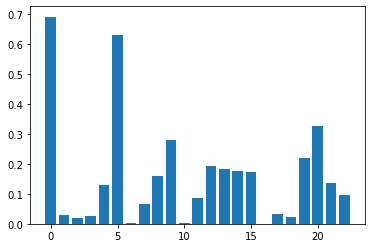

In [106]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('%s, %s: %f' % (i,features[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Task 2
Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?

In [107]:
#We start by standardizing the features:
from sklearn.preprocessing import StandardScaler

#Encoding features
oe2 = OrdinalEncoder()
oe2.fit(X)
X_enc = oe2.transform(X)
X_enc

#Standardizing
X_stan = StandardScaler().fit_transform(X_enc)


In [108]:
#We use sklearns decomposition library for PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(X_stan)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                          'principal component 4'])
principalDf

principal component 1  principal component 2  principal component 3  \
0                 -0.321339              -0.694414              -0.235312   
1                 -2.476961              -0.080556               0.803438   
2                 -2.179894              -0.770273               0.617275   
3                 -0.580731              -0.485103              -0.051091   
4                 -0.114274              -1.921669               3.274323   
...                     ...                    ...                    ...   
8119              -2.525551               0.042872              -1.621452   
8120              -2.702510               0.497757              -3.206411   
8121              -1.891054               0.151486              -1.597372   
8122               3.729152              -1.121342              -0.719662   
8123              -1.940948              -0.397422              -1.731109   

      principal component 4  
0                 -0.374808  
1                 -0.139390  
2                  0.558665  
3                 -0.268063  
4                  0.295992  
...                     ...  
8119               6.881096  
8120               8.335291  
8121               6.941589  
8122              -0.109715  
8123               6.952595  

[8124 rows x 4 columns]

In [109]:
# We check the amount of variance each PC explains:
pca.explained_variance_ratio_

array([0.19017657, 0.1257281 , 0.11569365, 0.09943218])

In [110]:
# We see PC1 explains the most, so we can check it to see which features influence it.
abs(pca.components_)

array([[3.17822639e-01, 1.58447501e-02, 1.03590864e-01, 1.50338729e-01,
        3.26912135e-01, 1.86439477e-01, 6.43359060e-02, 1.23948733e-02,
        3.69333662e-01, 3.80190979e-01, 1.60165294e-01, 2.57273862e-01,
        1.45860279e-01, 1.62184602e-01, 6.18013891e-02, 5.76814419e-02,
        0.00000000e+00, 6.17414532e-02, 1.52252640e-02, 4.02314043e-01,
        3.36438528e-01, 2.41012588e-02, 1.10850659e-01],
       [3.09338998e-01, 5.26977160e-02, 6.10218843e-02, 1.79746041e-01,
        2.28250174e-01, 3.29686700e-01, 1.27314782e-03, 1.39155018e-01,
        1.25978623e-01, 8.35784281e-02, 2.68803305e-01, 8.39394799e-03,
        3.07991566e-01, 2.78269177e-01, 3.64700252e-01, 3.62350495e-01,
        0.00000000e+00, 5.28263565e-03, 1.73228931e-01, 4.73091268e-02,
        3.01381308e-01, 1.71301226e-01, 3.33970393e-02],
       [1.26509458e-01, 7.58685469e-03, 1.87859709e-01, 2.17557675e-01,
        2.02168250e-01, 6.73727535e-02, 1.58522252e-01, 5.20268242e-01,
        1.07960856e-01

We know that the components value has a structure of [n_components, n_features].
This means we can see that a higher n-value equals higher importance in relation to our PC1.

We see that especially 0, 4, 8, 9, 19, 20 have higher values,
which we can see a consistency of in our previous search for discriminative/important features.

In both these searches 0, 20, 9 have high importance; these features being edibility, gill-color and spore-print-color.